In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns

#### Import + Clean Data

In [2]:
dataset_link = "https://www.kaggle.com/datasets/yasserh/housing-prices-dataset"
df = pd.read_csv("../data/Housing.csv")
df = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

In [3]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [5]:
def divide_by_1000(num):
    return num / 1000

x_values = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_values = x_values.to_numpy()
y_values = df['price'].apply(divide_by_1000)
y_values = y_values.to_numpy()

In [6]:
training_percentage = 0.80
num_train = len(x_values) * 0.8
X_train = x_values[:436]
y_train = y_values[:436]
X_test = x_values[436:]
y_test = y_values[436:]

print(f"X training values (10): \n{X_train[:10]} \n\nY training values (10): \n{y_train[:10]}")

X training values (10): 
[[ 7420     4     2     3     2]
 [ 8960     4     4     4     3]
 [ 9960     3     2     2     2]
 [ 7500     4     2     2     3]
 [ 7420     4     1     2     2]
 [ 7500     3     3     1     2]
 [ 8580     4     3     4     2]
 [16200     5     3     2     0]
 [ 8100     4     1     2     2]
 [ 5750     3     2     4     1]] 

Y training values (10): 
[13300. 12250. 12250. 12215. 11410. 10850. 10150. 10150.  9870.  9800.]


#### EDA

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


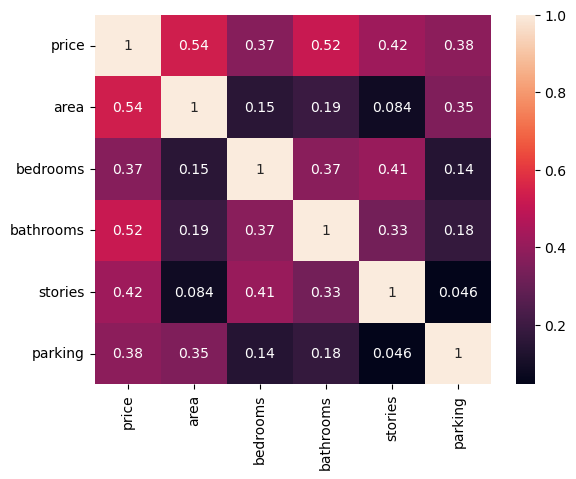

In [9]:
sns.heatmap(df.corr(), annot=True,)
plt.show()

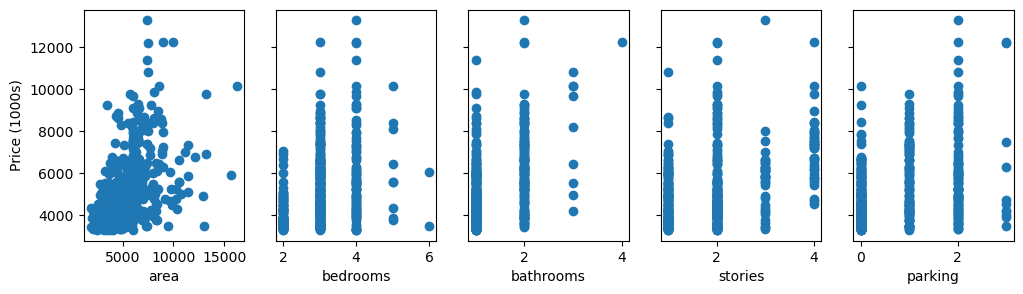

In [10]:
X_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, ax = plt.subplots(1, 5, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (1000s)")
plt.show()

#### Model

In [11]:
b_init = 800
w_init = np.array([1.2, 2000, 2000, 2000, 2000])

In [12]:
# model
def predict(X, y, w, b):
    return np.dot(w, X) + b

In [13]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    f_wb = np.dot(X, w) + b
    cost = (f_wb - y) ** 2
    
    total_cost = (1 / (2 * m)) * np.sum(cost)
    
    return total_cost

In [14]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    
    f_wb = np.dot(X, w) + b 
    error = f_wb - y 
    
    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db

In [15]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function, print_iterations=True):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        dj_dw,dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
          
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if print_iterations:
            if i% math.ceil(num_iters / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

1. test + graph
    - graph divergence and oscillation
2. z-score normalisation + learning rate tuning
    - graph convergence and cost function (and difference)
3. recreate in scikit learn
    - compare r^2 difference, parameters and predictions
    - graph a parity plot

In [16]:
# testing gradient descent
w_init = np.zeros(len(w_init))
b_init = 0
w_final, b_final, J_history = gradient_descent(X_train, y_train, w_init, b_init, num_iters=1000, alpha=0.01, cost_function=compute_cost, gradient_function=compute_gradient)

# here we can clearly see the numbers are getting too big, so we need to normalise features

Iteration    0: Cost 1.6561200736581307e+18   
Iteration  100: Cost nan   
Iteration  200: Cost nan   
Iteration  300: Cost nan   
Iteration  400: Cost nan   
Iteration  500: Cost nan   
Iteration  600: Cost nan   
Iteration  700: Cost nan   
Iteration  800: Cost nan   
Iteration  900: Cost nan   


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/fc/523c1q1n21sbcl_fnrq0t2zm0000gn/T/ipykernel_5722/902143396.py:5: RuntimeWarning: overflow encountered in square
  cost = (f_wb - y) ** 2
/var/folders/fc/523c1q1n21sbcl_fnrq0t2zm0000gn/T/ipykernel_5722/2054435432.py:10: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw


In [17]:
def normalise_features(X):
    mu =  np.mean(X, axis=0) # a row where each column holds the average value of that feature
    sigma = np.std(X, axis=0) # average distance of every feature from its mean (row of std for each feature)
    X_norm = ( X - mu ) / sigma # applying transformation to matrix
    return X_norm, mu, sigma

In [18]:
X_norm, mu, sigma = normalise_features(X_train)
w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, num_iters=1000, alpha=0.01, cost_function=compute_cost, gradient_function=compute_gradient)

# here we see we can actually compute the cost function and get gradient descent working

Iteration    0: Cost 15134028.070554849   
Iteration  100: Cost 2617324.5883459626   
Iteration  200: Cost 999933.996465266   
Iteration  300: Cost 783453.7075155264   
Iteration  400: Cost 754026.1103589825   
Iteration  500: Cost 749949.7356769581   
Iteration  600: Cost 749365.6340465442   
Iteration  700: Cost 749276.7060787622   
Iteration  800: Cost 749261.7871001849   
Iteration  900: Cost 749258.939747344   


In [19]:
# now we will see if we can optimise alpha to make the computer work a little less harder then it has to
alphas = [0.03, 0.1, 0.3, 1]
def print_alphas(alphas_list):
    for alpha in alphas:
        print(f"Alpha: {alpha}")
        w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, num_iters=1000, alpha=alpha, cost_function=compute_cost, gradient_function=compute_gradient)
        print()

print_alphas(alphas)

Alpha: 0.03
Iteration    0: Cost 14540062.582973173   
Iteration  100: Cost 780183.5023049532   
Iteration  200: Cost 749351.6214607497   
Iteration  300: Cost 749258.8417792756   
Iteration  400: Cost 749258.1247185976   
Iteration  500: Cost 749258.1116615749   
Iteration  600: Cost 749258.1113690889   
Iteration  700: Cost 749258.1113622963   
Iteration  800: Cost 749258.1113621369   
Iteration  900: Cost 749258.1113621331   

Alpha: 0.1
Iteration    0: Cost 12562269.951159071   
Iteration  100: Cost 749258.2304353901   
Iteration  200: Cost 749258.1113624286   
Iteration  300: Cost 749258.111362133   
Iteration  400: Cost 749258.1113621331   
Iteration  500: Cost 749258.1113621328   
Iteration  600: Cost 749258.1113621331   
Iteration  700: Cost 749258.1113621331   
Iteration  800: Cost 749258.1113621331   
Iteration  900: Cost 749258.1113621331   

Alpha: 0.3
Iteration    0: Cost 7777890.215019596   
Iteration  100: Cost 749258.1113621331   
Iteration  200: Cost 749258.1113621328 

In [21]:
# we can see that we can reduce our iterations
alpha_in = 0.3
iterations = [1000, 500, 250, 150]
for iteration in iterations:
    print(f"Total Iterations: {iteration}")
    w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, num_iters=iteration, alpha=alpha_in, cost_function=compute_cost, gradient_function=compute_gradient)
    print()

Total Iterations: 1000
Iteration    0: Cost 7777890.215019596   
Iteration  100: Cost 749258.1113621331   
Iteration  200: Cost 749258.1113621328   
Iteration  300: Cost 749258.1113621328   
Iteration  400: Cost 749258.1113621328   
Iteration  500: Cost 749258.1113621328   
Iteration  600: Cost 749258.1113621328   
Iteration  700: Cost 749258.1113621328   
Iteration  800: Cost 749258.1113621328   
Iteration  900: Cost 749258.1113621328   

Total Iterations: 500
Iteration    0: Cost 7777890.215019596   
Iteration   50: Cost 749258.1113957382   
Iteration  100: Cost 749258.1113621331   
Iteration  150: Cost 749258.111362133   
Iteration  200: Cost 749258.1113621328   
Iteration  250: Cost 749258.1113621328   
Iteration  300: Cost 749258.1113621328   
Iteration  350: Cost 749258.1113621328   
Iteration  400: Cost 749258.1113621328   
Iteration  450: Cost 749258.1113621328   

Total Iterations: 250
Iteration    0: Cost 7777890.215019596   
Iteration   25: Cost 749259.2808574587   
Iteratio

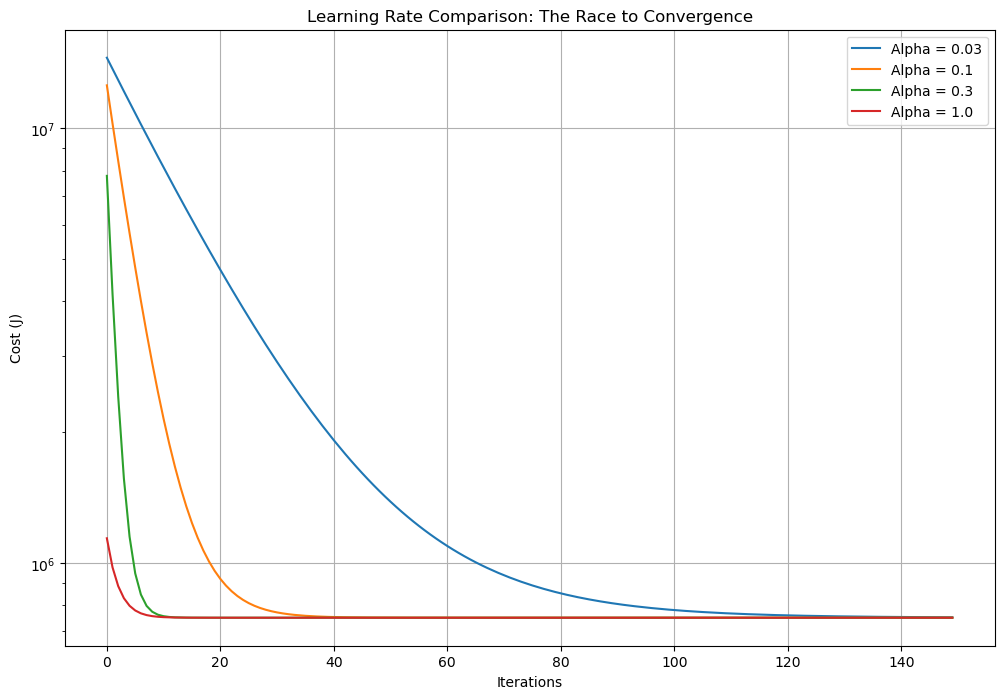

In [24]:
def run_gradient_descent_experiments(X, y, alphas, num_iters=500):
    # Initialize plot
    plt.figure(figsize=(12, 8))
    
    # We generally start new experiments with 0 weights
    n = X.shape[1]
    w_init = np.zeros(n)
    b_init = 0.
    
    for alpha in alphas:
        # Run Gradient Descent
        w_final, b_final, J_hist = gradient_descent(
            X, y, w_init, b_init, num_iters, alpha, 
            compute_cost, compute_gradient, print_iterations=False
        )
        
        # Add to plot
        plt.plot(J_hist, label=f"Alpha = {alpha}")

    # Finalize Plot
    plt.title('Learning Rate Comparison: The Race to Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (J)')
    plt.yscale('log') # Log scale helps see small differences at the bottom
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Run the Experiment ---
alphas_to_test = [0.03, 0.1, 0.3, 1.0]
run_gradient_descent_experiments(X_norm, y_train, alphas_to_test, num_iters=150)

In [32]:
# final results
alpha_final = 0.3
iterations_final = 150
w_init = np.zeros(len(w_init))
b_init = 0.0
w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, 
                                               num_iters=iterations_final, alpha=alpha_final, 
                                               cost_function=compute_cost, 
                                               gradient_function=compute_gradient,
                                               print_iterations=False)
X_test = x_values[436:]
y_test = y_values[436:]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Normalize the TEST set using the TRAINING statistics
# Note: We use the 'mu' and 'sigma' we captured earlier, NOT new ones
X_test_norm = (X_test - mu) / sigma

# 2. Make predictions on the test set
# y_hat = w * X + b
y_test_pred = np.dot(X_test_norm, w_final) + b_final

# 3. Calculate the Test Error (MSE)
# We can reuse your cost function logic here manually
m_test = len(y_test)
test_cost = (1/(2*m_test)) * np.sum((y_test_pred - y_test)**2)

print(f"Final Training Cost: {J_history[-1]:0.2f}")
print(f"Final Test Cost:     {test_cost:0.2f}")

# 4. Visual Check: Compare first 5 predictions
print("\n--- Visual Check ---")
for i in range(10):
    print(f"House {i}: Predicted ${y_test_pred[i]:0.0f} | Actual ${y_test[i]:0.0f}")

print("\n--- STARTING SCIKIT-LEARN AUDIT ---")

# 1. Train the Industry Standard Model
# We use X_norm so we can compare the weights (w) directly to yours
sklearn_model = LinearRegression()
sklearn_model.fit(X_norm, y_train)

# 2. Make Predictions
# We use the same normalized test set we created earlier
sk_pred = sklearn_model.predict(X_test_norm)

# 3. Compare Metrics
sk_mse = mean_squared_error(y_test, sk_pred)
my_mse = test_cost * 2 # Multiply by 2 because your cost function divides by 2m, MSE usually divides by m

print(f"My MSE (adjusted):      {my_mse:.2f}")
print(f"Sklearn MSE:            {sk_mse:.2f}")
print(f"Difference:             {abs(my_mse - sk_mse):.2f}")

# 4. Compare Weights (The DNA check)
print("\n--- WEIGHT COMPARISON ---")
print(f"My Weights:      {w_final}")
print(f"Sklearn Weights: {sklearn_model.coef_}")

# 5. R-Squared Score (Accuracy %)
r2 = r2_score(y_test, sk_pred)
print(f"\nR^2 Score: {r2:.4f} (1.0 is perfect)")

Final Training Cost: 749258.11
Final Test Cost:     1066923.71

--- Visual Check ---
House 0: Predicted $3742 | Actual $3290
House 1: Predicted $4636 | Actual $3290
House 2: Predicted $3791 | Actual $3255
House 3: Predicted $3628 | Actual $3255
House 4: Predicted $4289 | Actual $3234
House 5: Predicted $4378 | Actual $3220
House 6: Predicted $3602 | Actual $3220
House 7: Predicted $4190 | Actual $3220
House 8: Predicted $4020 | Actual $3220
House 9: Predicted $3371 | Actual $3150

--- STARTING SCIKIT-LEARN AUDIT ---
My MSE (adjusted):      2133847.42
Sklearn MSE:            2133847.42
Difference:             0.00

--- WEIGHT COMPARISON ---
My Weights:      [630.66498342  85.67578926 555.15357475 459.58280724 294.72184872]
Sklearn Weights: [630.66498342  85.67578926 555.15357475 459.58280724 294.72184872]

R^2 Score: -11.5438 (1.0 is perfect)


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


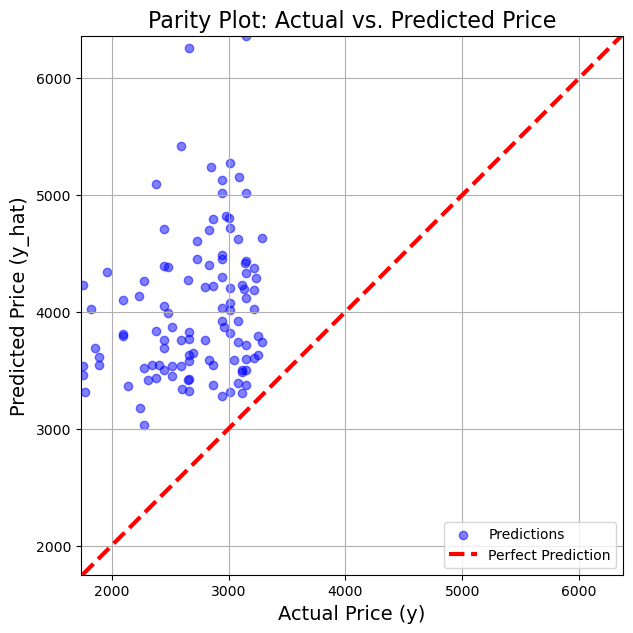

In [40]:
import matplotlib.pyplot as plt

def plot_parity(y_true, y_pred):
    plt.figure(figsize=(7, 7))
    
    # 1. Create the Scatter Plot
    # Alpha makes the dots transparent so you can see if they pile up
    plt.scatter(y_true, y_pred, c='blue', alpha=0.5, label='Predictions')
    
    # 2. Create the "Perfect Prediction" Line (45 degrees)
    # This line represents where Predicted Price == Actual Price
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=3, label='Perfect Prediction')
    
    # 3. Labeling
    plt.title('Parity Plot: Actual vs. Predicted Price', fontsize=16)
    plt.xlabel('Actual Price (y)', fontsize=14)
    plt.ylabel('Predicted Price (y_hat)', fontsize=14)
    plt.legend()
    plt.grid(True)
    
    # Optional: Set axis to be square so the 45-degree line looks correct
    plt.axis('equal')
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.show()

# Run the function
plot_parity(y_test, y_test_pred)

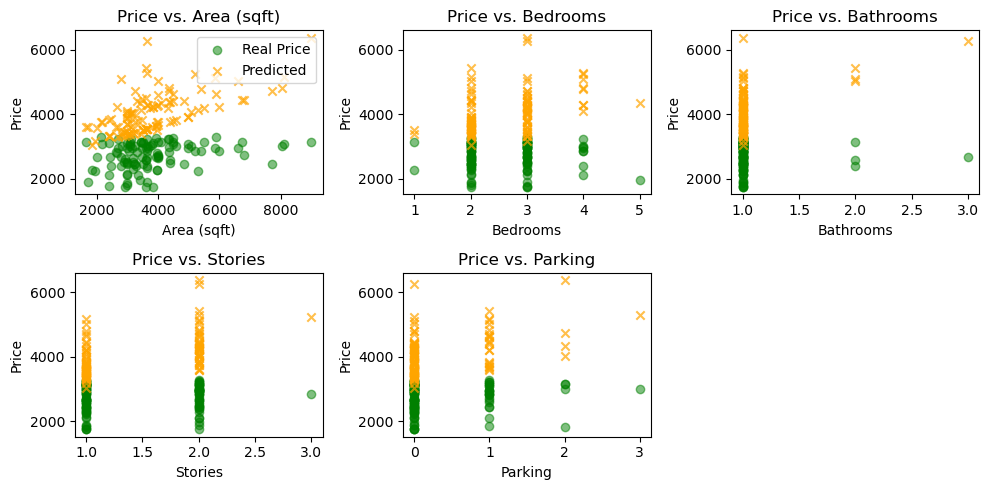

In [46]:
def plot_features_vs_price(X, y_true, y_pred, feature_names):
    # Setup a grid of plots (2 rows, 3 columns to fit 5 features)
    num_features = X.shape[1]
    rows = 2
    cols = 3
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
    axes = axes.flatten() # Flattens the 2D grid into a 1D list for easy looping
    
    for i in range(num_features):
        ax = axes[i]
        feature_data = X[:, i] # Get the column for the current feature
        
        # 1. Plot Real Values (Green Dots)
        ax.scatter(feature_data, y_true, color='green', alpha=0.5, label='Real Price')
        
        # 2. Plot Predicted Values (Orange Xs)
        ax.scatter(feature_data, y_pred, color='orange', alpha=0.7, marker='x', label='Predicted')
        
        ax.set_title(f'Price vs. {feature_names[i]}')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Price')
        
        # Only add legend to the first plot to avoid clutter
        if i == 0:
            ax.legend()
            
    # Hide the empty 6th subplot (since we only have 5 features)
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

# Define your feature names
my_features = ['Area (sqft)', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']

# Run the plot
# NOTE: Ensure X_test is the RAW data, not the normalized data!
plot_features_vs_price(X_test, y_test, y_test_pred, my_features)

In [50]:
import pickle
# bundle model together and store it
alpha_final = 0.3
iterations_final = 150
w_init = np.zeros(len(w_init))
b_init = 0.0
w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_init, b_init, 
                                               num_iters=iterations_final, alpha=alpha_final, 
                                               cost_function=compute_cost, 
                                               gradient_function=compute_gradient,
                                               print_iterations=False)

model_data = {
    "w": w_final,
    "b": b_final,
    "mu": mu,
    "sigma": sigma
}

with open('house_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)